In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [2]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
sample_submit = pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [4]:
train.shape

(614, 13)

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
train["source"] = 'train'
test["source"] = 'test'

In [7]:
print("train size :",train.shape)
print("test size :",test.shape)

train size : (614, 14)
test size : (367, 13)


In [8]:
dataf = pd.concat([train,test],axis=0)

In [9]:
dataf.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [10]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
source               981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [11]:
dataf.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [12]:
dataf.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [13]:
dataf.shape

(981, 14)

In [14]:
dataf['Gender'] = dataf['Gender'].fillna( dataf['Gender'].mode().values[0] )
dataf['Married'] = dataf['Married'].fillna( dataf['Married'].mode().values[0] )
dataf['Dependents'] = dataf['Dependents'].fillna( dataf['Dependents'].mode().values[0] )
dataf['Self_Employed'] = dataf['Self_Employed'].fillna( dataf['Self_Employed'].mode().values[0] )
dataf['LoanAmount'] = dataf['LoanAmount'].fillna( dataf['LoanAmount'].mean() )
dataf['Loan_Amount_Term'] = dataf['Loan_Amount_Term'].fillna( dataf['Loan_Amount_Term'].mode().values[0] )
dataf['Credit_History'] = dataf['Credit_History'].fillna( dataf['Credit_History'].mode().values[0] )
dataf['Dependents'] = dataf['Dependents'].str.rstrip('+')
dataf['Gender'] = dataf['Gender'].map({'Female':0,'Male':1}).astype(np.float)
dataf['Married'] = dataf['Married'].map({'No':0, 'Yes':1}).astype(np.float)
dataf['Education'] = dataf['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.float)
dataf['Self_Employed'] = dataf['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.float)
dataf['Dependents'] = dataf['Dependents'].astype(np.float)
dataf['Loan_Status'] = dataf['Loan_Status'].fillna( dataf['Loan_Status'].mode().values[0] )

In [15]:
dataf.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0.0,1.0,1.0,142.51153,360.0,LP001002,Y,0.0,Urban,0.0,train
1,4583,1508.0,1.0,1.0,1.0,1.0,128.00000,360.0,LP001003,N,1.0,Rural,0.0,train
2,3000,0.0,1.0,0.0,1.0,1.0,66.00000,360.0,LP001005,Y,1.0,Urban,1.0,train
3,2583,2358.0,1.0,0.0,0.0,1.0,120.00000,360.0,LP001006,Y,1.0,Urban,0.0,train
4,6000,0.0,1.0,0.0,1.0,1.0,141.00000,360.0,LP001008,Y,0.0,Urban,0.0,train


In [16]:
#dataf = pd.concat([dataf, pd.get_dummies(dataf['source'])], axis=1);

In [17]:
dataf.drop(['source','Property_Area'],axis=1,inplace=True)

In [18]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null float64
Education            981 non-null float64
Gender               981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          981 non-null object
Married              981 non-null float64
Self_Employed        981 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 99.6+ KB


In [19]:
dataf=dataf.set_index('Loan_ID').reset_index()

In [20]:
dataf.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Self_Employed
0,LP001002,5849,0.0,1.0,0.0,1.0,1.0,142.51153,360.0,Y,0.0,0.0
1,LP001003,4583,1508.0,1.0,1.0,1.0,1.0,128.00000,360.0,N,1.0,0.0
2,LP001005,3000,0.0,1.0,0.0,1.0,1.0,66.00000,360.0,Y,1.0,1.0
3,LP001006,2583,2358.0,1.0,0.0,0.0,1.0,120.00000,360.0,Y,1.0,0.0
4,LP001008,6000,0.0,1.0,0.0,1.0,1.0,141.00000,360.0,Y,0.0,0.0


In [21]:
X,y  = dataf.drop(['Loan_Status','Loan_ID'],axis=1), dataf['Loan_Status']

In [22]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Married',
       'Self_Employed'],
      dtype='object')

In [23]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

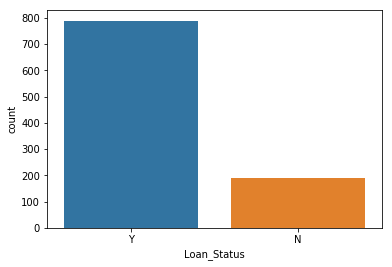

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(data=dataf, x = 'Loan_Status', label='Count')

In [27]:
# Correlation
Loan_Corr = dataf.corr()
Loan_Corr

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Self_Employed
ApplicantIncome,1.000000,-0.114247,0.020201,0.122136,0.138909,0.060444,0.547188,-0.023823,0.052126,0.113106
CoapplicantIncome,-0.114247,1.000000,-0.011531,0.003223,0.060380,0.082428,0.178449,-0.042750,0.061606,-0.018861
Credit_History,0.020201,-0.011531,1.000000,-0.045335,0.062416,0.018627,-0.003577,-0.021495,0.021738,0.034485
Dependents,0.122136,0.003223,-0.045335,1.000000,-0.084894,0.139248,0.149233,-0.084190,0.344291,0.026241
Education,0.138909,0.060380,0.062416,-0.084894,1.000000,-0.040649,0.162215,0.021575,-0.026211,0.010848
Gender,0.060444,0.082428,0.018627,0.139248,-0.040649,1.000000,0.096499,-0.069058,0.327012,0.024719
LoanAmount,0.547188,0.178449,-0.003577,0.149233,0.162215,0.096499,1.000000,0.053187,0.156737,0.106942
Loan_Amount_Term,-0.023823,-0.042750,-0.021495,-0.084190,0.021575,-0.069058,0.053187,1.000000,-0.047505,-0.031451
Married,0.052126,0.061606,0.021738,0.344291,-0.026211,0.327012,0.156737,-0.047505,1.000000,0.013666
Self_Employed,0.113106,-0.018861,0.034485,0.026241,0.010848,0.024719,0.106942,-0.031451,0.013666,1.000000


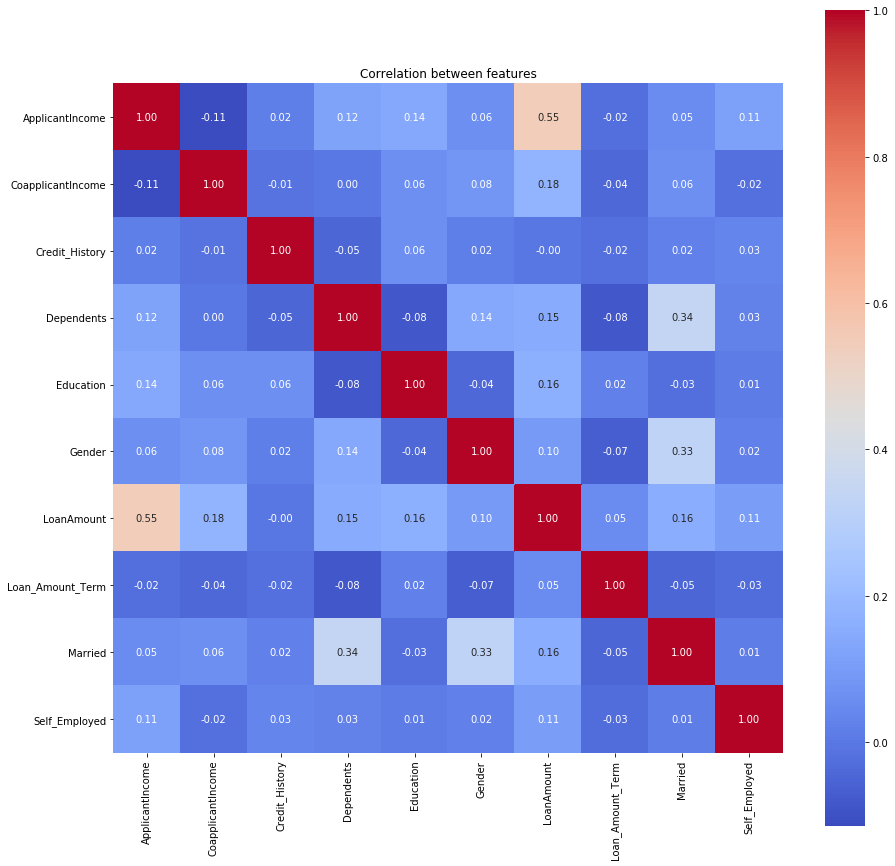

In [29]:
plt.figure(figsize=(15, 15))
sns.heatmap(Loan_Corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

def processResults(clk, str="", X_test = X_test, X_train = X_train, Y_test = Y_test, Y_train = Y_train):
    predicted = clk.predict(X_test)
    score = round(clk.score(X_train, Y_train) * 100, 2)
    score_test = round(clk.score(X_test, Y_test) * 100, 2)

    print(str + 'Training score: \n', score)
    print(str + 'Test Score: \n', score_test)
    print('Accuracy: \n', accuracy_score(Y_test,predicted))
    print(confusion_matrix(Y_test,predicted))
    print(classification_report(Y_test,predicted))
    sns.heatmap(confusion_matrix(Y_test,predicted),annot=True,fmt="d")
    return score, score_test

Logistic Regression Training score: 
 81.34
Logistic Regression Test Score: 
 82.71
Accuracy: 
 0.827118644068
[[ 12  42]
 [  9 232]]
             precision    recall  f1-score   support

          N       0.57      0.22      0.32        54
          Y       0.85      0.96      0.90       241

avg / total       0.80      0.83      0.79       295

Coefficient: 
 [[ -1.39463002e-05  -6.95097756e-05   2.09374649e+00   1.05457420e-01
    5.60511157e-01  -2.40964090e-02  -1.98689288e-03  -1.63594061e-03
    3.45106212e-01  -2.85616228e-01]]
Intercept: 
 [ 0.1800802]


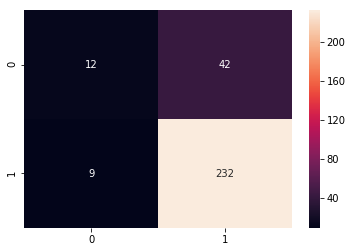

In [35]:
from sklearn.linear_model import LogisticRegression

#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, Y_train)

logreg_score, logreg_score_test = processResults(logreg, "Logistic Regression ")

print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)

Gaussian Naive Bayesian Training score: 
 82.51
Gaussian Naive Bayesian Test Score: 
 78.31
Accuracy: 
 0.783050847458
[[ 16  38]
 [ 26 215]]
             precision    recall  f1-score   support

          N       0.38      0.30      0.33        54
          Y       0.85      0.89      0.87       241

avg / total       0.76      0.78      0.77       295



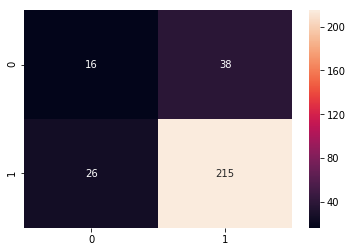

In [37]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gauss_score, gauss_score_test = processResults(gaussian, "Gaussian Naive Bayesian ")

Decision Tree Training score: 
 83.67
Decision Tree Test Score: 
 80.0
Accuracy: 
 0.8
[[ 14  40]
 [ 19 222]]
             precision    recall  f1-score   support

          N       0.42      0.26      0.32        54
          Y       0.85      0.92      0.88       241

avg / total       0.77      0.80      0.78       295



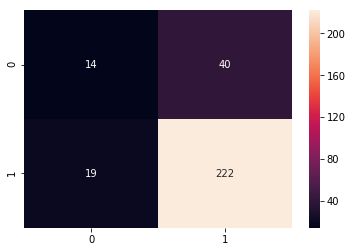

In [40]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
decision_tree.fit(X_train, Y_train)
decision_tree_score, decision_tree_score_test  = processResults(decision_tree, "Decision Tree ")

Random Forest Training score: 
 100.0
Random Forest Test Score: 
 81.02
Accuracy: 
 0.810169491525
[[ 12  42]
 [ 14 227]]
             precision    recall  f1-score   support

          N       0.46      0.22      0.30        54
          Y       0.84      0.94      0.89       241

avg / total       0.77      0.81      0.78       295



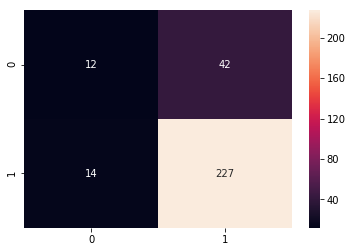

In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

random_forest_score, random_forest_score_test  = processResults(random_forest, "Random Forest ")

Training score: 
 86.15
Test Score: 
 81.02
Accuracy: 
 0.810169491525
[[ 12  42]
 [ 14 227]]
             precision    recall  f1-score   support

          N       0.46      0.22      0.30        54
          Y       0.84      0.94      0.89       241

avg / total       0.77      0.81      0.78       295



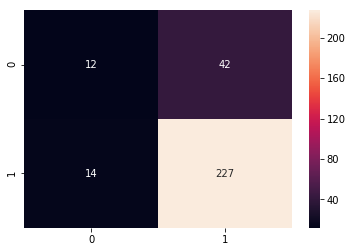

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', StandardScaler()),    
    ('pca', PCA(n_components=8)),
    ('svc', SVC()),
])
pipe.fit(X_train, Y_train)
svcScore, svcScore_test = processResults(pipe)

Training score: 
 84.84
Test Score: 
 80.68
Accuracy: 
 0.806779661017
[[ 13  41]
 [ 16 225]]
             precision    recall  f1-score   support

          N       0.45      0.24      0.31        54
          Y       0.85      0.93      0.89       241

avg / total       0.77      0.81      0.78       295



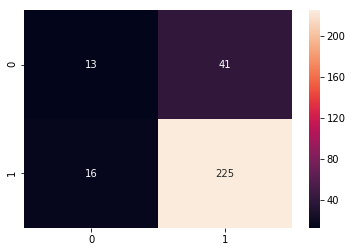

In [44]:
from sklearn.neighbors import KNeighborsClassifier

pipeknn = Pipeline([
    ('scale', StandardScaler()),    
    ('knn', KNeighborsClassifier(n_neighbors=5)),
])
pipeknn.fit(X_train, Y_train)
knnTrainScore, knnTestScore = processResults(pipeknn)

In [45]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Decision Tree', 'Random Forest', 'Support Vector Classifier', 'Nearest Neighbour'],
    'Score': [ logreg_score, gauss_score, decision_tree_score, random_forest_score, svcScore, knnTrainScore],
    'Test Score': [ logreg_score_test, gauss_score_test, decision_tree_score_test, random_forest_score_test, svcScore_test, knnTestScore]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,81.34,82.71
3,Random Forest,100.00,81.02
4,Support Vector Classifier,86.15,81.02
5,Nearest Neighbour,84.84,80.68
2,Decision Tree,83.67,80.00
1,Gaussian Naive Bayes,82.51,78.31


In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [195]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.806


In [141]:
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(LogisticRegression(C=1,penalty='l1'))
sel.fit(scaler.transform(X_train),Y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [142]:
print('Total features-->',X_train.shape[1])
print('Selected featurs-->',sum(sel.get_support()))
print('Removed featurs-->',np.sum(sel.estimator_.coef_==0))

Total features--> 10
Selected featurs--> 10
Removed featurs--> 0


In [138]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)
